# Oasis Infobyte Data Science Internship
# Name: Neha Joshi
# Task 5: Sales Prediction Using Python

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [108]:
df = pd.read_csv(r"C:\Users\Advertising.csv") 

In [109]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [110]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [111]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [112]:
df.shape

(200, 5)

In [113]:
df.size

1000

In [114]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [115]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [116]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [117]:
df=df.drop(['Unnamed: 0'],axis=1)

In [118]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [119]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [198]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1.0, 'Correlation between dataset')

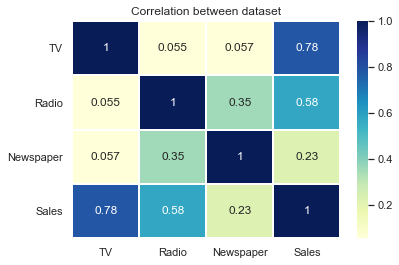

In [120]:
sns.heatmap(df.corr(),cmap="YlGnBu", linecolor='white', linewidths=1,annot=True)
plt.title('Correlation between dataset')

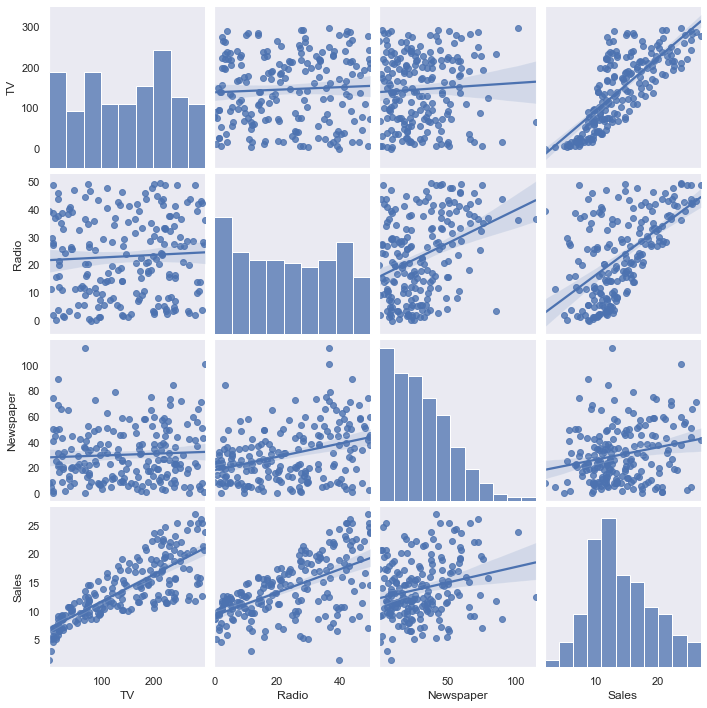

In [200]:
sns.pairplot(df,kind='reg')

<AxesSubplot:xlabel='Radio', ylabel='Count'>

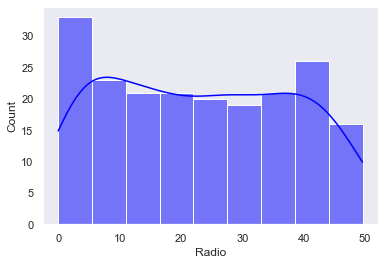

In [204]:
sns.histplot(data=df, x="Radio", kde=True,color="blue")

<AxesSubplot:xlabel='Newspaper', ylabel='Count'>

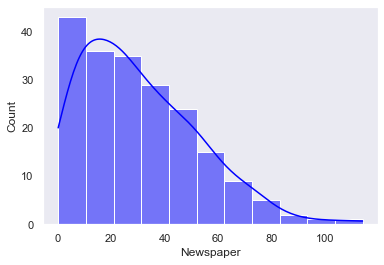

In [205]:
sns.histplot(data=df, x="Newspaper", kde=True, color="blue")

<AxesSubplot:xlabel='TV', ylabel='Count'>

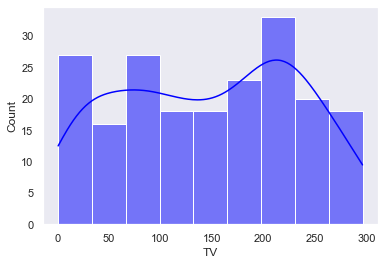

In [206]:
sns.histplot(data=df, x="TV", kde=True,color="blue")

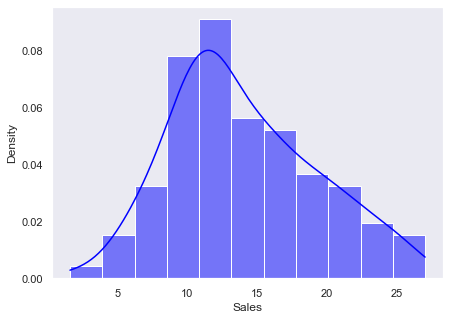

In [207]:
plt.figure(figsize=(7,5))
sns.histplot(df['Sales'], color="blue", label="100% Equities", kde=True, stat="density")
plt.show()

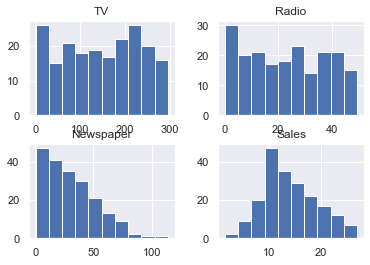

In [203]:
sns.set(style="dark")
df.hist()
plt.show()

In [147]:
x= df[['TV', 'Radio', 'Newspaper']]


In [148]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [149]:
y = df[['Sales']]

In [150]:
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [187]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [188]:
print(x.shape, x_train.shape, x_test.shape)

(200, 3) (140, 3) (60, 3)


In [189]:
print(y.shape, y_train.shape, y_test.shape)

(200, 1) (140, 1) (60, 1)


In [190]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [191]:
Prediction = lr.predict(x_test)

In [192]:
Prediction

array([[21.66318307],
       [16.44137936],
       [ 7.69144625],
       [17.9163172 ],
       [18.67047113],
       [23.79199311],
       [16.2825425 ],
       [13.44138683],
       [ 9.15294033],
       [17.32475313],
       [14.43922876],
       [ 9.84019547],
       [17.26329945],
       [16.62853147],
       [15.09158705],
       [15.50173894],
       [12.43404074],
       [17.32591521],
       [11.04327486],
       [18.05652777],
       [ 9.35309526],
       [12.79465958],
       [ 8.73413846],
       [10.47225333],
       [11.38216042],
       [15.02658554],
       [ 9.7406823 ],
       [19.44676903],
       [18.19211174],
       [17.20178728],
       [21.56359539],
       [14.70484262],
       [16.2635213 ],
       [12.37098906],
       [19.97059316],
       [15.36768988],
       [14.00399515],
       [10.0772945 ],
       [20.91891557],
       [ 7.43833283],
       [ 3.67031166],
       [ 7.27760354],
       [ 5.99523188],
       [18.41497546],
       [ 8.31868226],
       [14

In [193]:
R2=metrics.r2_score(y_test, Prediction)
print("R2 Score:{}".format(R2))

R2 Score:0.9224605706201435


In [194]:
mse = mean_squared_error(y_test,Prediction)
print('Mean squared error: {:.2f}'.format(mse))

Mean squared error: 1.93


In [195]:
rmse = np.sqrt(mse)
print(f'Root mean squared error: {rmse:.2f}')

Root mean squared error: 1.39
